<h3 align="right">32566 Mahesh Shriram</h3>

#### 6) Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on
the given dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Understanding

In [4]:
df.shape

(150, 5)

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Initialization

In [8]:
x = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values

### Data PreProecessing

In [9]:
from sklearn.preprocessing import MinMaxScaler 
#scales values in range (0,1)
Scaler = MinMaxScaler()
x = Scaler.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

### Naive Bayes Classification

In [11]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [12]:
y_pred = classifier.predict(x_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype='<U10')

### Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(f"confusion_matrix: \n {cm}")

confusion_matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(0.5, 1.0, 'Confusion Matrix')

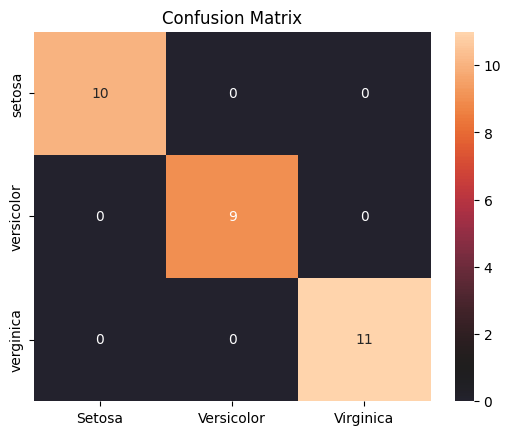

In [14]:
sns.heatmap(cm, annot = True, center = True, xticklabels=['Setosa','Versicolor','Virginica'],yticklabels = ['setosa','versicolor','verginica'])
plt.title("Confusion Matrix")

#### Claculating TP, FN, FP, TN

In [15]:
# for Setosa class
tp = cm[0,0]
fn = cm[0,1] + cm[0,2]
fp = cm[1,0] + cm[2,0]
tn = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]

print("Output values: ")
print("True positive", tp)
print("false Negative", fn)
print("False Postive", fp)
print("True Negative", tn)


Output values: 
True positive 10
false Negative 0
False Postive 0
True Negative 20


In [16]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
print("accuracy_score = ", accuracy_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred, average = 'micro'))
print("Precision = ", precision_score(y_test, y_pred,average = 'micro'))

accuracy_score =  1.0
Recall =  1.0
Precision =  1.0


In [17]:
#For Versicolor Class

tp = cm[1, 1]
fn = cm[1, 0] + cm[1, 2]
fp = cm[0, 1] + cm[2, 1]
tn = cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2]

print(f"Outcome Values:\nTrue Positive : {tp} \nFalse Negative : {fn} \nFalse Positive : {fp} \nTrue Negative : {tn}")

Outcome Values:
True Positive : 9 
False Negative : 0 
False Positive : 0 
True Negative : 21


In [18]:
#For Virginica Class

tp = cm[2, 2]
fn = cm[2, 0] + cm[2, 1]  
fp = cm[0, 2] + cm[1, 2]
tn = cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1]

print(f"Outcome Values:\nTrue Positive : {tp} \nFalse Negative : {fn} \nFalse Positive : {fp} \nTrue Negative : {tn}")

Outcome Values:
True Positive : 11 
False Negative : 0 
False Positive : 0 
True Negative : 19
